In [128]:
import re
import pandas as pd
import numpy as np

In [129]:
f = open('WhatsApp Chat with INNO CORE TEAM[2023-24].txt','r',encoding='utf-8')
data =f.read()

In [130]:
print(type(data))
print(data)

<class 'str'>
26/08/23, 8:57 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
26/08/23, 8:56 am - Chandani Vanani LD created group "INNO CORE TEAM"
26/08/23, 8:57 am - Chandani Vanani LD added you
26/08/23, 8:59 am - Chandani Vanani LD added Gojiya Nikhil LD and Nishant Panchasara LD
26/08/23, 9:02 am - Chandani Vanani LD added +91 79902 77543
26/08/23, 9:37 am - Rohan LD changed this group's icon
26/08/23, 9:39 am - Rohan LD changed the group name from "INNO CORE TEAM" to "INNO CORE TEAM[2023-24]"
26/08/23, 9:54 am - Rohan LD added +91 91738 07367
26/08/23, 9:56 am - Rohan LD added Mann Nagda LD
27/08/23, 12:16 pm - Meghavi LD: null
27/08/23, 12:16 pm - Meghavi LD: Aa message tamara department na groups ma forward kari dejo ne
27/08/23, 12:17 pm - Meghavi LD: Badha j year na groups ma
27/08/23, 12:18 pm - Meghavi LD: https://www.instagram.com/p/CwcDKrutMdH/?igshid=MzRlODBiNWFlZA==

"Teamwor

In [131]:
pattern = '\d{2}/\d{2}/\d{2},\s\d{1,2}:\d{2}\s[ap]m\s-\s'

In [132]:
msg = re.split(pattern,data)[1:]
msg

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Chandani Vanani LD created group "INNO CORE TEAM"\n',
 'Chandani Vanani LD added you\n',
 'Chandani Vanani LD added Gojiya Nikhil LD and Nishant Panchasara LD\n',
 'Chandani Vanani LD added +91 79902 77543\n',
 "Rohan LD changed this group's icon\n",
 'Rohan LD changed the group name from "INNO CORE TEAM" to "INNO CORE TEAM[2023-24]"\n',
 'Rohan LD added +91 91738 07367\n',
 'Rohan LD added Mann Nagda LD\n',
 'Meghavi LD: null\n',
 'Meghavi LD: Aa message tamara department na groups ma forward kari dejo ne\n',
 'Meghavi LD: Badha j year na groups ma\n',
 'Meghavi LD: https://www.instagram.com/p/CwcDKrutMdH/?igshid=MzRlODBiNWFlZA==\n\n"Teamwork makes the dream work: Celebrating the past, stepping into the future."\n\n*Featuring the legacy and the evolution of INNOVATOR CLUB in one frame🖼!!!*\n\nWe the *Team INNOVATOR*😎,are back with new dyna

In [133]:
dates = re.findall(pattern,data)
dates 

['26/08/23, 8:57\u202fam - ',
 '26/08/23, 8:56\u202fam - ',
 '26/08/23, 8:57\u202fam - ',
 '26/08/23, 8:59\u202fam - ',
 '26/08/23, 9:02\u202fam - ',
 '26/08/23, 9:37\u202fam - ',
 '26/08/23, 9:39\u202fam - ',
 '26/08/23, 9:54\u202fam - ',
 '26/08/23, 9:56\u202fam - ',
 '27/08/23, 12:16\u202fpm - ',
 '27/08/23, 12:16\u202fpm - ',
 '27/08/23, 12:17\u202fpm - ',
 '27/08/23, 12:18\u202fpm - ',
 '27/08/23, 12:18\u202fpm - ',
 '27/08/23, 12:32\u202fpm - ',
 '27/08/23, 12:35\u202fpm - ',
 '27/08/23, 12:35\u202fpm - ',
 '27/08/23, 12:36\u202fpm - ',
 '27/08/23, 12:36\u202fpm - ',
 '27/08/23, 12:37\u202fpm - ',
 '27/08/23, 12:39\u202fpm - ',
 '27/08/23, 12:39\u202fpm - ',
 '27/08/23, 12:40\u202fpm - ',
 '27/08/23, 12:40\u202fpm - ',
 '27/08/23, 12:42\u202fpm - ',
 '27/08/23, 12:46\u202fpm - ',
 '27/08/23, 12:47\u202fpm - ',
 '27/08/23, 12:47\u202fpm - ',
 '27/08/23, 12:47\u202fpm - ',
 '27/08/23, 12:50\u202fpm - ',
 '27/08/23, 12:50\u202fpm - ',
 '27/08/23, 12:51\u202fpm - ',
 '27/08/23, 12:59

In [134]:
df = pd.DataFrame({'user_message':msg, 'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'], format="%d/%m/%y, %I:%M %p - ")
df.rename(columns = {'message_date' : 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-08-26 08:57:00
1,"Chandani Vanani LD created group ""INNO CORE TE...",2023-08-26 08:56:00
2,Chandani Vanani LD added you\n,2023-08-26 08:57:00
3,Chandani Vanani LD added Gojiya Nikhil LD and ...,2023-08-26 08:59:00
4,Chandani Vanani LD added +91 79902 77543\n,2023-08-26 09:02:00


In [135]:
df.shape

(9596, 2)

In [136]:
users=[]
messages=[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('Group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,date,user,message
0,2023-08-26 08:57:00,Group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-08-26 08:56:00,Group_notification,"Chandani Vanani LD created group ""INNO CORE TE..."
2,2023-08-26 08:57:00,Group_notification,Chandani Vanani LD added you\n
3,2023-08-26 08:59:00,Group_notification,Chandani Vanani LD added Gojiya Nikhil LD and ...
4,2023-08-26 09:02:00,Group_notification,Chandani Vanani LD added +91 79902 77543\n


In [137]:
df['year'] = df['date'].dt.year

In [138]:
df['month'] = df['date'].dt.month_name()

In [139]:
df['day'] = df['date'].dt.day

In [140]:
df.head()

,date,user,message,year,month,day
0,2023-08-26 08:57:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,26
1,2023-08-26 08:56:00,Group_notification,"Chandani Vanani LD created group ""INNO CORE TE...",2023,August,26
2,2023-08-26 08:57:00,Group_notification,Chandani Vanani LD added you\n,2023,August,26
3,2023-08-26 08:59:00,Group_notification,Chandani Vanani LD added Gojiya Nikhil LD and ...,2023,August,26
4,2023-08-26 09:02:00,Group_notification,Chandani Vanani LD added +91 79902 77543\n,2023,August,26


In [141]:
df['hour'] = df['date'].dt.hour

In [142]:
df['minute'] = df['date'].dt.minute

In [143]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-08-26 08:57:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,26,8,57
1,2023-08-26 08:56:00,Group_notification,"Chandani Vanani LD created group ""INNO CORE TE...",2023,August,26,8,56
2,2023-08-26 08:57:00,Group_notification,Chandani Vanani LD added you\n,2023,August,26,8,57
3,2023-08-26 08:59:00,Group_notification,Chandani Vanani LD added Gojiya Nikhil LD and ...,2023,August,26,8,59
4,2023-08-26 09:02:00,Group_notification,Chandani Vanani LD added +91 79902 77543\n,2023,August,26,9,2


In [144]:
df[df['user'] == 'Kaushal Vadadoria'].shape

(133, 8)

In [145]:
words=[]
for  message in df['message']:
    words.extend(message.split())

In [146]:
len(words)

46710

In [147]:
from urlextract import URLExtract
extract = URLExtract()
link = []
for message in df['message']:
    link.extend(extract.find_urls(message))

In [148]:
len(link)

84

In [149]:
x = df['user'].value_counts().head()

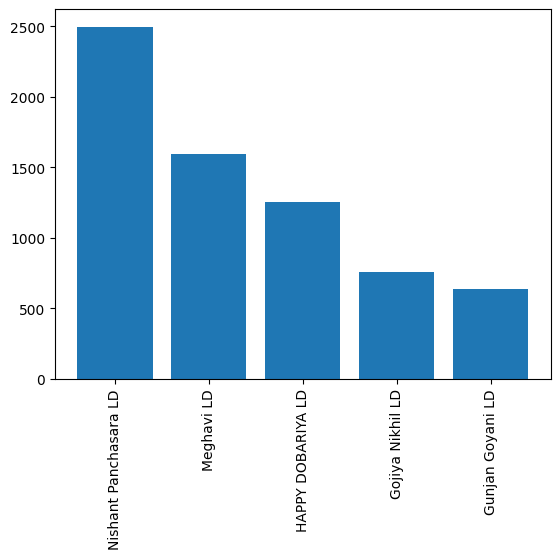

In [150]:
import matplotlib.pyplot as plt
name = x.index
count = x.values
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [151]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index': 'name','user':'precent'})

,precent,count
0,Nishant Panchasara LD,26.02
1,Meghavi LD,16.65
2,HAPPY DOBARIYA LD,13.06
3,Gojiya Nikhil LD,7.89
4,Gunjan Goyani LD,6.62
5,Chandani Vanani LD,5.33
6,Moksha Gandhi LD,4.31
7,Disha LD,4.15
8,Diya Patel LD,4.05
9,Rohan LD,3.69


In [152]:
words = []
for message in df['message']:
    words.extend(message.split())

In [153]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,to,949
1,<Media,865
2,omitted>,865
3,ne,627
4,ma,605
5,che,517
6,j,433
7,message,387
8,e,364
9,na,342


In [154]:
temp = df[df['user'] !='Group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [155]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
# print(stop_words)

In [156]:
y = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            y.append(word)
# print(y)

In [157]:
from collections import Counter
pd.DataFrame(Counter(y).most_common(20))

,0,1
0,message,385
1,6e,254
2,badha,221
3,deleted,183
4,birthday,178
5,happy,170
6,etle,168
7,nu,155
8,team,153
9,kale,141


In [158]:
import emoji

In [159]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [160]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,632
1,🤣,360
2,🥳,204
3,🏻,169
4,😅,154
...,...,...
188,🏏,1
189,🌎,1
190,🤑,1
191,😚,1


In [161]:
df['month_num'] = df['date'].dt.month

In [162]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2023-08-26 08:57:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,26,8,57,8
1,2023-08-26 08:56:00,Group_notification,"Chandani Vanani LD created group ""INNO CORE TE...",2023,August,26,8,56,8
2,2023-08-26 08:57:00,Group_notification,Chandani Vanani LD added you\n,2023,August,26,8,57,8
3,2023-08-26 08:59:00,Group_notification,Chandani Vanani LD added Gojiya Nikhil LD and ...,2023,August,26,8,59,8
4,2023-08-26 09:02:00,Group_notification,Chandani Vanani LD added +91 79902 77543\n,2023,August,26,9,2,8
...,...,...,...,...,...,...,...,...,...
9591,2024-08-28 10:00:00,Nishant Panchasara LD,25 hati\n,2024,August,28,10,0,8
9592,2024-08-28 10:00:00,Nishant Panchasara LD,Mey atayre tya j joyu\n,2024,August,28,10,0,8
9593,2024-08-28 11:25:00,+91 91738 07367,Kem tane meghavi par bharoso nato?😜😂\n,2024,August,28,11,25,8
9594,2024-08-28 11:26:00,Nishant Panchasara LD,<Media omitted>\n,2024,August,28,11,26,8


In [163]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [164]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+' '+str(timeline['year'][i]))

In [165]:
timeline['time']=time

In [166]:
timeline

,year,month_num,month,message,time
0,2023,8,August,234,August 2023
1,2023,9,September,1203,September 2023
2,2023,10,October,1021,October 2023
3,2023,11,November,416,November 2023
4,2023,12,December,1587,December 2023
5,2024,1,January,655,January 2024
6,2024,2,February,1324,February 2024
7,2024,3,March,816,March 2024
8,2024,4,April,416,April 2024
9,2024,5,May,542,May 2024


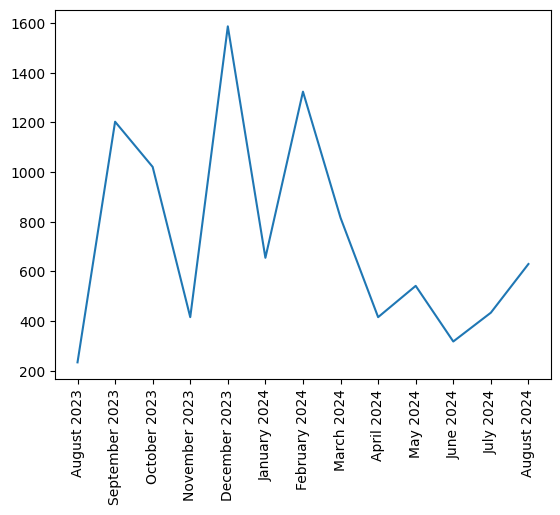

In [167]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [168]:
df['only_date'] = df['date'].dt.date

In [169]:
daily_timeline = df.groupby(['only_date']).count()['message'].reset_index()

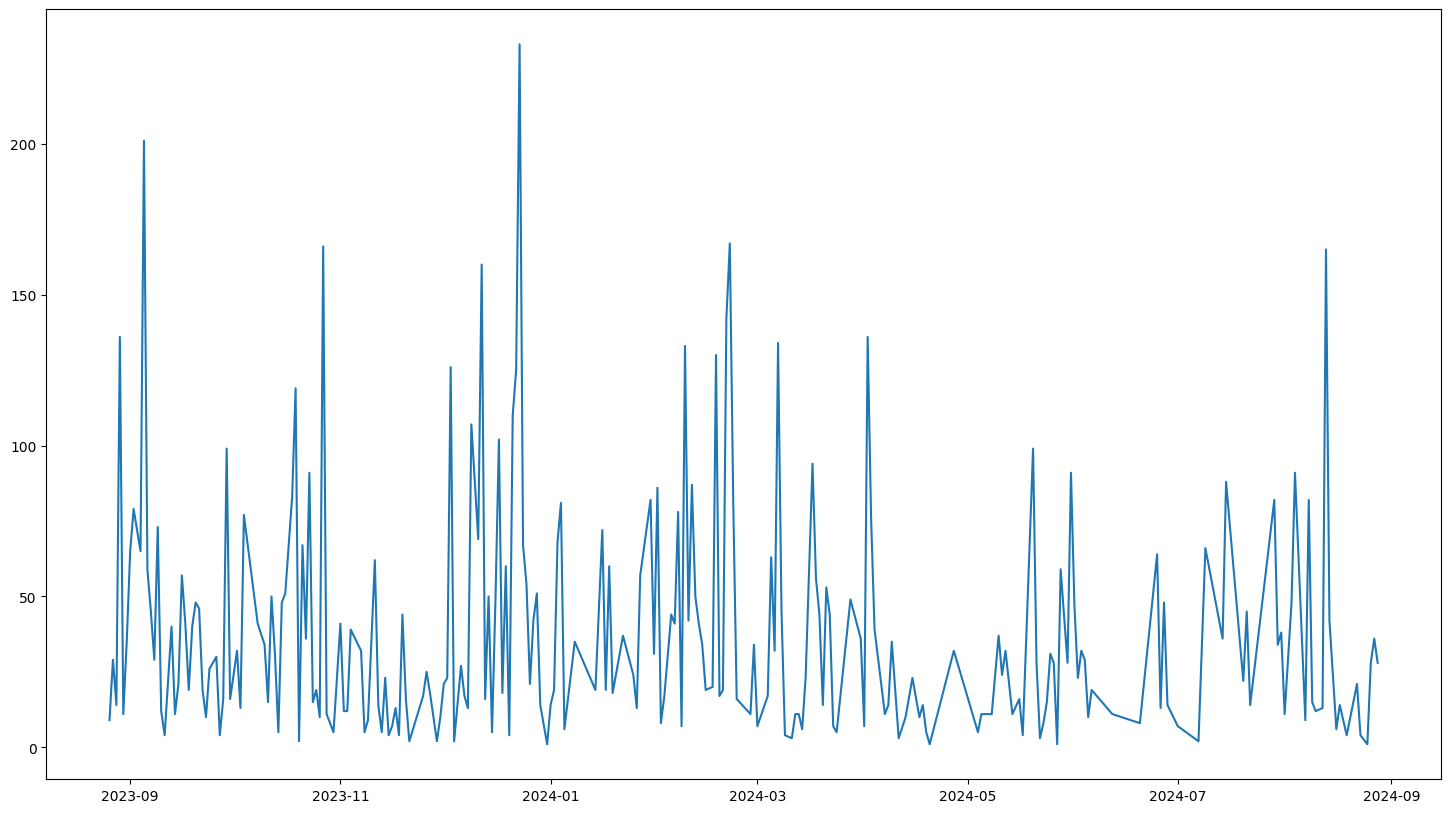

In [170]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [171]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2023-08-26 08:57:00,Group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,26,8,57,8,2023-08-26
1,2023-08-26 08:56:00,Group_notification,"Chandani Vanani LD created group ""INNO CORE TE...",2023,August,26,8,56,8,2023-08-26
2,2023-08-26 08:57:00,Group_notification,Chandani Vanani LD added you\n,2023,August,26,8,57,8,2023-08-26
3,2023-08-26 08:59:00,Group_notification,Chandani Vanani LD added Gojiya Nikhil LD and ...,2023,August,26,8,59,8,2023-08-26
4,2023-08-26 09:02:00,Group_notification,Chandani Vanani LD added +91 79902 77543\n,2023,August,26,9,2,8,2023-08-26


In [172]:
df['day_name'] = df['date'].dt.day_name()

In [173]:
df['day_name'].value_counts()

day_name
Tuesday      1822
Thursday     1615
Saturday     1328
Sunday       1263
Friday       1204
Wednesday    1188
Monday       1176
Name: count, dtype: int64

In [174]:
df['month'].value_counts()

month
December     1587
February     1324
September    1203
October      1021
August        864
March         816
January       655
May           542
July          434
November      416
April         416
June          318
Name: count, dtype: int64

In [175]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))


In [176]:
df['period'] = period

In [177]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
4509,2024-01-03 09:33:00,Chandani Vanani LD,Bdha Rami shake aevu kaik rmvanu Che dostoonn....,2024,January,3,9,33,1,2024-01-03,Wednesday,9-10
3325,2023-12-12 18:47:00,Nishant Panchasara LD,Pelo j question hase price su\n,2023,December,12,18,47,12,2023-12-12,Tuesday,18-19
4857,2024-01-19 08:34:00,Gunjan Goyani LD,Happiest birthday @919106299377 🎉🥳\n,2024,January,19,8,34,1,2024-01-19,Friday,8-9
8380,2024-06-12 20:49:00,Nishant Panchasara LD,This message was deleted\n,2024,June,12,20,49,6,2024-06-12,Wednesday,20-21
3813,2023-12-21 21:45:00,HAPPY DOBARIYA LD,Kn hu help karis\n,2023,December,21,21,45,12,2023-12-21,Thursday,21-22


In [178]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,2-3,20-21,21-22,22-23,23-00,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,7.0,1.0,28.0,91.0,28.0,119.0,55.0,37.0,43.0,48.0,...,3.0,96.0,51.0,117.0,63.0,0.0,8.0,26.0,85.0,115.0
Monday,18.0,16.0,48.0,46.0,16.0,182.0,112.0,32.0,53.0,53.0,...,0.0,61.0,57.0,38.0,25.0,6.0,9.0,10.0,51.0,102.0
Saturday,29.0,0.0,98.0,52.0,64.0,38.0,30.0,45.0,137.0,109.0,...,0.0,72.0,101.0,111.0,106.0,0.0,1.0,21.0,60.0,95.0
Sunday,2.0,0.0,131.0,45.0,135.0,53.0,54.0,51.0,32.0,19.0,...,0.0,130.0,40.0,94.0,52.0,1.0,2.0,25.0,90.0,109.0
Thursday,6.0,3.0,83.0,38.0,55.0,118.0,76.0,36.0,41.0,166.0,...,2.0,150.0,214.0,88.0,45.0,0.0,2.0,16.0,51.0,117.0
Tuesday,13.0,0.0,122.0,79.0,133.0,197.0,31.0,51.0,79.0,105.0,...,0.0,188.0,186.0,219.0,26.0,4.0,6.0,26.0,53.0,74.0
Wednesday,2.0,3.0,103.0,43.0,41.0,58.0,70.0,21.0,64.0,139.0,...,0.0,74.0,132.0,50.0,84.0,0.0,0.0,7.0,33.0,62.0


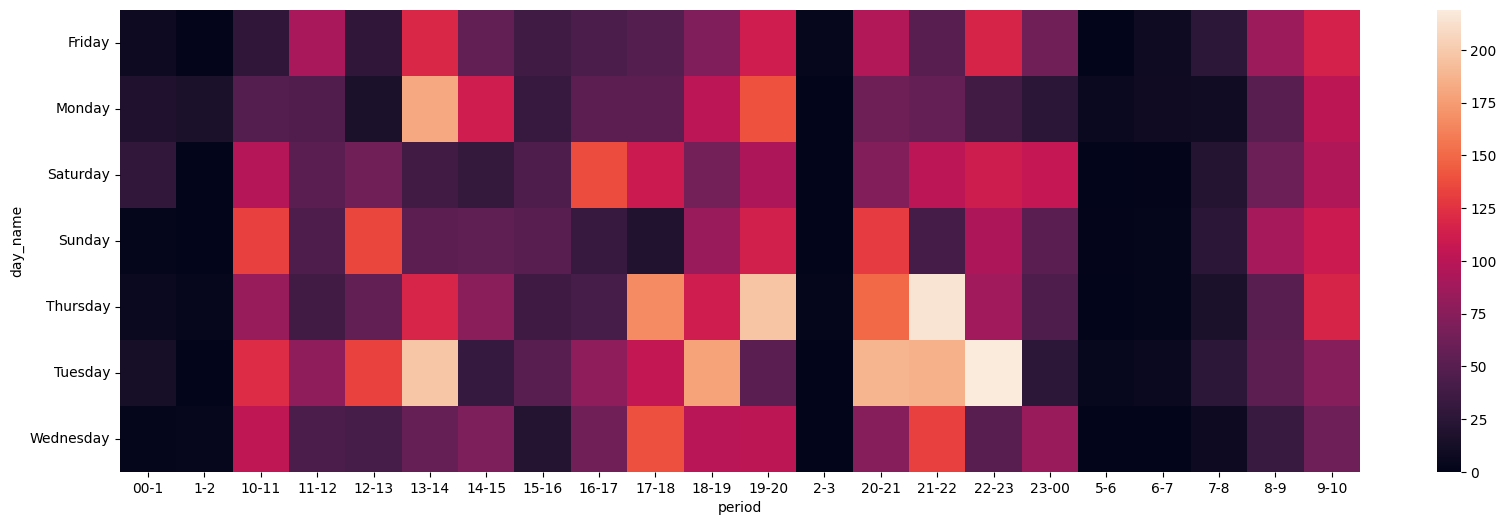

In [179]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()

In [183]:
import matplotlib
import urlextract
print("re",re.__version__)
print("pandas",pd.__version__)
print("numpy",np.__version__)
print("url",urlextract.__version__)
print("mlt",matplotlib.__version__)
print("emoji",emoji.__version__)
print("seaborn",sns.__version__)

re 2.2.1
pandas 2.0.3
numpy 1.24.4
url 1.9.0
mlt 3.7.2
emoji 2.12.1
seaborn 0.13.0
